In [ ]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans

import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

In [ ]:
# Spotify_5000songs.csv
url = "https://drive.google.com/file/d/1UJ9k6oz_zqc71stMJZsiFwEniyP8pBfB/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
spotify_5000songs = pd.read_csv(path)

In [ ]:
songs_5000_copy = spotify_5000songs.copy()

In [ ]:
songs_5000_copy.columns = songs_5000_copy.columns.str.replace(' ', '')

In [ ]:
songs_5000 = songs_5000_copy.set_index(['name', 'artist']).drop(columns = ['id', 'html', 'type', 'Unnamed:0']).copy()

In [ ]:
songs_5000

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


# 0: Data Feature Selection

In [ ]:
songs_5000.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
dropped_columns = ['duration_ms', 'time_signature', 'speechiness']

# 1: Scaler/ Transformer

# 2: Principle Component Analysis (PCA)

In [ ]:
# using Min Max scaler
scaler = MinMaxScaler().set_output(transform = 'pandas')
songs_5000 = songs_5000.drop(columns = dropped_columns)
minmax_transformed_df = scaler.fit_transform(songs_5000)

In [ ]:
# Initialise the PCA object
pca = PCA().set_output(transform = 'pandas')

# Fit the PCA
pca.fit(minmax_transformed_df)

# Transform the sclaed df based on the pca fit calculation
pca_all_df = pca.transform(minmax_transformed_df)

pca_all_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
name,artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.107423,-0.756296,0.504192,0.438603,-0.257737,0.555523,0.559811,0.198753,-0.096358,0.007113
Saudade De Bahia,Antônio Carlos Jobim,-0.011696,0.453526,0.382220,-0.225525,0.081945,-0.173540,0.041160,0.110916,-0.171248,-0.013866
"Canta Canta, Minha Gente",Martinho Da Vila,-0.108258,0.503217,0.481998,-0.230807,0.282211,-0.013864,0.027752,-0.142606,0.127929,-0.090156
Mulher Eu Sei,Chico César,0.507296,0.175743,0.811845,-0.007010,-0.075537,0.107262,0.222699,0.102400,-0.087651,-0.013809
Rosa Morena,Kurt Elling,0.543419,0.122876,0.744460,0.172925,-0.152497,-0.082222,0.007502,0.093346,0.025767,-0.061664
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.173292,-0.132416,0.127041,-0.106179,-0.115999,-0.079543,-0.001846,-0.068436,-0.082608,-0.008047
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.970916,-0.084460,0.213585,0.173293,-0.305996,-0.097260,-0.026992,-0.105465,-0.105246,-0.008264
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.388477,-0.347843,-0.017583,0.424615,0.003712,-0.091916,-0.005921,-0.142352,-0.236765,-0.255199


select 90% for PCA

In [ ]:
pca_90 = PCA(n_components = 0.9).set_output(transform = 'pandas')
pca_90.fit(minmax_transformed_df)
pca_90_df = pca_90.transform(minmax_transformed_df)

pca_90_df

,,pca0,pca1,pca2,pca3,pca4
name,artist,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.107423,-0.756296,0.504192,0.438603,-0.257737
Saudade De Bahia,Antônio Carlos Jobim,-0.011696,0.453526,0.382220,-0.225525,0.081945
"Canta Canta, Minha Gente",Martinho Da Vila,-0.108258,0.503217,0.481998,-0.230807,0.282211
Mulher Eu Sei,Chico César,0.507296,0.175743,0.811845,-0.007010,-0.075537
Rosa Morena,Kurt Elling,0.543419,0.122876,0.744460,0.172925,-0.152497
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.173292,-0.132416,0.127041,-0.106179,-0.115999
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.970916,-0.084460,0.213585,0.173293,-0.305996
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.388477,-0.347843,-0.017583,0.424615,0.003712


In [ ]:
pca_95 = PCA(n_components = 0.95).set_output(transform = 'pandas')
pca_95.fit(minmax_transformed_df)
pca_95_df = pca_95.transform(minmax_transformed_df)

pca_95_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.107423,-0.756296,0.504192,0.438603,-0.257737,0.555523,0.559811
Saudade De Bahia,Antônio Carlos Jobim,-0.011696,0.453526,0.382220,-0.225525,0.081945,-0.173540,0.041160
"Canta Canta, Minha Gente",Martinho Da Vila,-0.108258,0.503217,0.481998,-0.230807,0.282211,-0.013864,0.027752
Mulher Eu Sei,Chico César,0.507296,0.175743,0.811845,-0.007010,-0.075537,0.107262,0.222699
Rosa Morena,Kurt Elling,0.543419,0.122876,0.744460,0.172925,-0.152497,-0.082222,0.007502
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.173292,-0.132416,0.127041,-0.106179,-0.115999,-0.079543,-0.001846
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.970916,-0.084460,0.213585,0.173293,-0.305996,-0.097260,-0.026992
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.388477,-0.347843,-0.017583,0.424615,0.003712,-0.091916,-0.005921


# 3. KMeans Evaluation

In [ ]:
# Initialise the model
random_seed = 112
selected_kmeans = KMeans(n_clusters = 40, random_state = random_seed)

selected_kmeans.fit(pca_95_df)
selected_cluster = selected_kmeans.labels_

minmax_transformed_df['cluster'] = selected_cluster
minmax_transformed_df

,,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,artist,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,1.000000,0.763897,0.0,0.696787,0.000060,0.987842,0.310660,0.515800,15
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.181818,0.771967,1.0,0.217871,0.000002,0.108409,0.703553,0.584322,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.181818,0.798018,1.0,0.454819,0.000064,0.125633,0.918782,0.437862,4
Mulher Eu Sei,Chico César,0.729059,0.05020,0.363636,0.682811,1.0,0.882530,0.000041,0.391084,0.531980,0.499098,14
Rosa Morena,Kurt Elling,0.673216,0.11900,0.545455,0.655228,1.0,0.919679,0.000348,0.105370,0.408122,0.565171,11
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.272727,0.596818,1.0,0.920683,0.725888,0.084296,0.066497,0.410795,21
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.545455,0.621548,1.0,0.858434,0.432487,0.070314,0.036041,0.388495,0
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.818182,0.277803,1.0,0.954819,0.983756,0.078217,0.034924,0.334469,0


In [ ]:
no_songs = minmax_transformed_df.groupby('cluster')['cluster'].value_counts() # Use value_counts() to count unique values within each cluster

In [ ]:
mean_df = minmax_transformed_df.groupby('cluster').mean()
mean_df

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,
0,0.328825,0.128610,0.690909,0.622018,1.0,0.951525,0.881196,0.128993,0.155135,0.509307
1,0.791918,0.705314,0.894831,0.871731,0.0,0.198802,0.013178,0.150176,0.807843,0.548937
2,0.648253,0.568778,0.570707,0.801190,1.0,0.468631,0.776960,0.213799,0.773632,0.602989
3,0.354798,0.889230,0.883636,0.874487,1.0,0.024815,0.058120,0.172583,0.196606,0.582858
4,0.793649,0.677556,0.115741,0.855789,1.0,0.176218,0.008881,0.129096,0.795258,0.528334
5,0.264576,0.916159,0.694335,0.845932,1.0,0.007814,0.865460,0.211559,0.210588,0.558003
6,0.313094,0.896137,0.305106,0.846170,0.0,0.011412,0.828211,0.218878,0.237360,0.565946
7,0.351681,0.145476,0.252791,0.627160,0.0,0.917451,0.884184,0.136820,0.171549,0.467361
8,0.339458,0.920391,0.727983,0.877249,0.0,0.013224,0.096852,0.179018,0.177805,0.567952


In [ ]:
mean_0_1_df = mean_df.reset_index().copy()
mean_0_1_df = mean_0_1_df.loc[mean_0_1_df['cluster'].isin([0, 1]), :]
mean_0_1_df = mean_0_1_df.transpose()
mean_0_1_df = mean_0_1_df.drop('cluster', axis=0)
mean_0_1_df

,0,1
danceability,0.328825,0.791918
energy,0.128610,0.705314
key,0.690909,0.894831
loudness,0.622018,0.871731
mode,1.000000,0.000000
acousticness,0.951525,0.198802
instrumentalness,0.881196,0.013178
liveness,0.128993,0.150176
valence,0.155135,0.807843
tempo,0.509307,0.548937


Sample 2 Playlist to QA the songs characteristics based on feature means

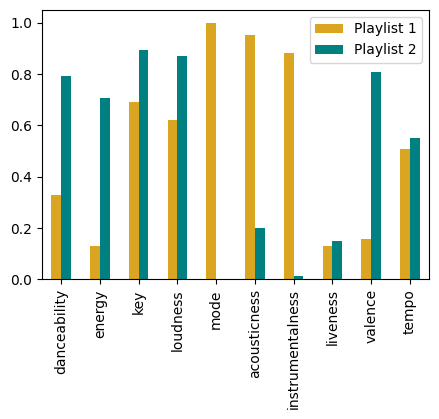

In [ ]:
ax = mean_0_1_df.plot.bar(color = ['goldenrod', 'teal'], figsize = (5,3.5))
ax.legend(['Playlist 1', 'Playlist 2'])

In [ ]:
# randomly choose 3 songs from each playlist for QA
clustered_songs_5 = minmax_transformed_df.reset_index()[['name', 'artist', 'cluster']]
sample_songs_5 = clustered_songs_5.groupby('cluster').sample(n = 5, random_state = 42)
sample_songs_5.loc[sample_songs_5['cluster'].isin([0, 1, 8, 34, 39]), :]

,name,artist,cluster
1872,Ravel Variation (Arr. for Violin & Piano after...,Maurice Ravel,0
1956,Gymnopédie No. 1: Lent et douloureux ...,Erik Satie,0
4590,Illusion Of Time - Teodor Wolgers Rework ...,Daniel Avery,0
2487,'Round Midnight ...,Thelonious Monk,0
4564,Sad Ocean ...,Chihei Hatakeyama,0
2261,P.I.M.P. ...,50 Cent,1
739,Wiggle (feat. Snoop Dogg) ...,Jason Derulo,1
724,Sexy Bitch (feat. Akon) ...,David Guetta,1
1656,Get the Party Started ...,P!nk,1
151,Baianá ...,Barbatuques,1


In [ ]:
test_songs = minmax_transformed_df.reset_index().copy()
test_songs.loc[test_songs['artist'].str.contains('schubert', case=False), :]

,name,artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,cluster
1905,"Minuet in A major, D. 334 ...",Franz Schubert,0.282316,0.00573,0.818182,0.338349,1.0,0.997992,0.926904,0.086829,0.176650,0.428156,0
1991,"4 Impromptus, Op. 90, D. 899: No. 3 in G-Flat ...",Franz Schubert,0.129266,0.00615,0.545455,0.369926,1.0,0.994980,0.900508,0.081256,0.059391,0.327660,0
2007,"4 Impromptus, Op. 90, D. 899: No. 3 in G-flat ...",Franz Schubert,0.132368,0.00262,0.545455,0.388771,1.0,0.994980,0.935025,0.112462,0.077056,0.315365,0
2021,"Minuet in E Major, D. 335 ...",Franz Schubert,0.507756,0.00862,0.363636,0.393222,1.0,0.995984,0.875127,0.136778,0.233503,0.285345,21
2063,"Piano Sonata No. 13 in A Major, D. 664: II. An...",Franz Schubert,0.381593,0.00245,0.181818,0.405399,1.0,0.998996,0.966497,0.072746,0.074721,0.451484,21
2118,"Moment Musical, Op. 94, D. 780: No. 3 in F Min...",Franz Schubert,0.527404,0.08850,0.454545,0.536614,0.0,0.995984,0.893401,0.691996,0.402030,0.381794,7
2431,"Ave Maria, D839 ...",Franz Schubert,0.127198,0.13800,0.909091,0.724821,1.0,0.997992,0.696447,0.111449,0.043858,0.344768,0
5138,"Symphony No.8 In B Minor, D.759 - ""Unfinished""...",Franz Schubert,0.218201,0.02920,1.000000,0.694858,0.0,0.946787,0.888325,0.120567,0.079188,0.555250,27


# ------------------------------------------------------------------------

In [ ]:
test_result = []
n = 0
for i in range(0, len(sample_songs_3), 3):
  song_name = sample_songs_3.iloc[i:i+3, 0]
  print(f'The songs are {song_name}')
  song_url = list(sample_songs_3.iloc[i:i+3, 4])
  print(song_url)
  qa_result = input('The QA result is: ')
  comment = input('Comment: ')
  n += 1
  test_result.append({'playlist': n-1 ,
                      'qa_result': qa_result,
                      'comment': comment})

The songs are 2465    Porgy (I Loves You Porgy) - Outtake           ...
1988    Because of You                                ...
1991    4 Impromptus, Op. 90, D. 899: No. 3 in G-Flat ...
Name: name, dtype: object
['https://open.spotify.com/track/3NmLBig4t7RZWbLT3U2eBb', 'https://open.spotify.com/track/19UeXD6XWfzovGrfNRG1PB', 'https://open.spotify.com/track/2iKBwP3nXg9EtaW6IckERw']
The QA result is: yes
Comment: instrumental, slow, waltz-liked, crystal noise
The songs are 4248    The Voyage                                    ...
3773    Malleus Maleficarum / Anthropomorphia         ...
3458    Blessed Are The Sick / Leading the Rats       ...
Name: name, dtype: object
['https://open.spotify.com/track/5ENHpbTUV2slzZAQRrEaeZ', 'https://open.spotify.com/track/2y7fEQqVcW1KVQ9c4SKsMv', 'https://open.spotify.com/track/5tkcDYuFIbljBOCgj9Bcru']
The QA result is: yes
Comment: instrumental, metal, dark, rock
The songs are 4244    Impending Diabolical Conquest                 ...
4278    Ominous

KeyboardInterrupt: Interrupted by user

In [ ]:
result_k50_95 = test_result.copy()
result_k50_95

[{'playlist': 0,
  'qa_result': 'yes',
  'comment': 'instrumental, slow, waltz-liked, crystal noise'},
 {'playlist': 1,
  'qa_result': 'yes',
  'comment': 'instrumental, metal, dark, rock'},
 {'playlist': 2,
  'qa_result': 'yes',
  'comment': 'instrumental, metal, darker previous one'},
 {'playlist': 3,
  'qa_result': 'yes',
  'comment': 'chill, guitar, acoustic liked'}]

In [ ]:
# save it later to a csv file
from google.colab import drive
drive.mount('/drive')

sample_songs_10.to_csv('/drive/My Drive/sample_songs.csv', index='False')